<h2> <font color="blue">II. Programming [9v] </font>
                           
<h4><font color="cyan"> Consider the diabetes.arff data available at the homework tab, comprising 8 biological features to 
classify 768 patients into 2 classes (normal, diabetes).

In [18]:
import seaborn as sns
import pandas as pd
from scipy.io import arff
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import numpy as np

data = arff.loadarff('diabetes.arff')
df = pd.DataFrame(data[0])

<h4> <font color="cyan"> 1)  [1v] ANOVA is a statistical test that can be used to assess the discriminative power of a 
single input variable. Using f_classif from sklearn, identify the input variables with the 
worst and best discriminative power. Plot their class-conditional probability density 
functions.

Variable with the best discriminative power: Glucose:213.16175217803828
Variable with the worst discriminative power: BloodPressure:3.256950397889028


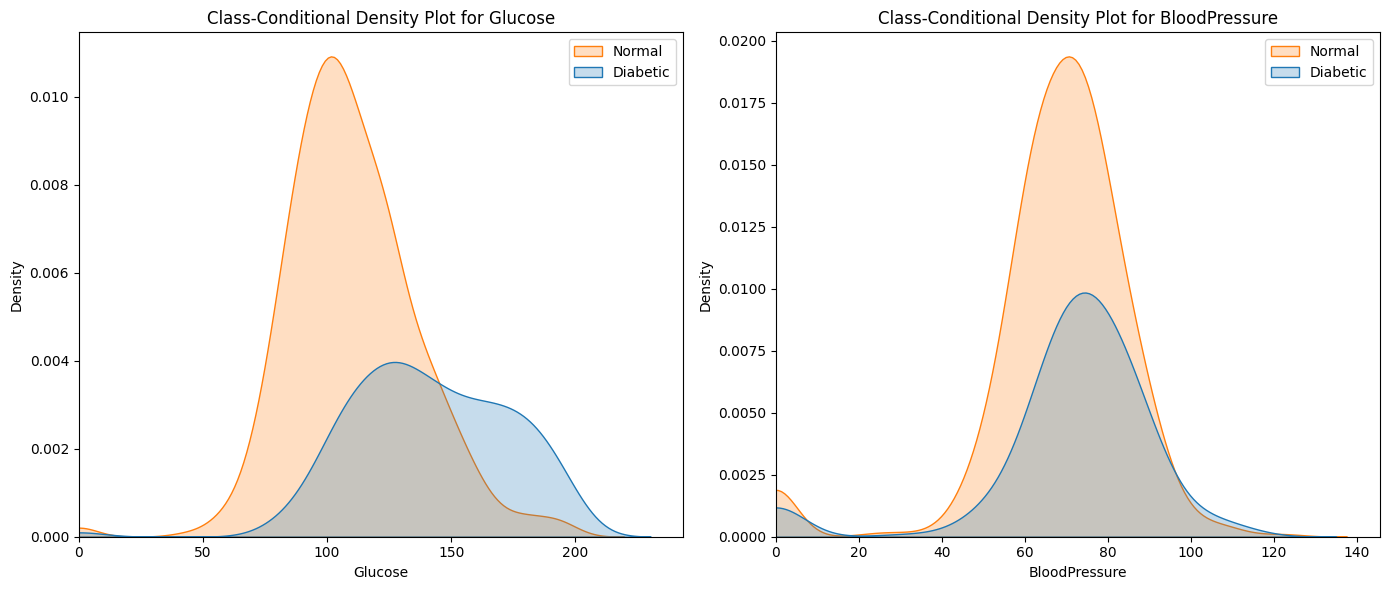

In [19]:
df['Outcome'] = df['Outcome'].str.decode('utf-8')
x = df.drop('Outcome', axis=1)
y = df['Outcome']

fimportance, p_value = f_classif(x, y)

feature_scores = sorted(zip(x.columns, fimportance), key=lambda x: x[1], reverse=True)
best_feature = feature_scores[0][0]
worst_feature = feature_scores[-1][0]
print(f"Variable with the best discriminative power: {best_feature}:{feature_scores[0][1]}")
print(f"Variable with the worst discriminative power: {worst_feature}:{feature_scores[-1][1]}")

plt.figure(figsize=(14, 6))

# Plot for the best feature
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x=best_feature, hue='Outcome', fill=True)
plt.title(f'Class-Conditional Density Plot for {best_feature}')
plt.xlim(left=0)
plt.legend(title='', labels=["Normal", "Diabetic"])
# Plot for the worst feature
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x=worst_feature, hue='Outcome', fill=True)
plt.title(f'Class-Conditional Density Plot for {worst_feature}')
plt.xlim(left=0)
plt.legend(title='', labels=["Normal", "Diabetic"])

plt.tight_layout()

<h4> <font color="cyan"> 2)  [4v] Using a stratified 80-20 training-testing split with a fixed seed (random_state=1), 
assess in a single plot both the training and testing accuracies of a decision tree with minimum 
sample split in {2,5,10,20,30,50,100} and the remaining parameters as default.  
[optional] Note that split thresholding of numeric variables in decision trees is non-
deterministic in sklearn, hence you may opt to average the results using 10 runs per 
parameterization.

Train accuracies:  [1.0, 0.97, 0.94, 0.88, 0.85, 0.84, 0.79] 
Test accuracies:  [0.69, 0.69, 0.69, 0.73, 0.77, 0.76, 0.75]


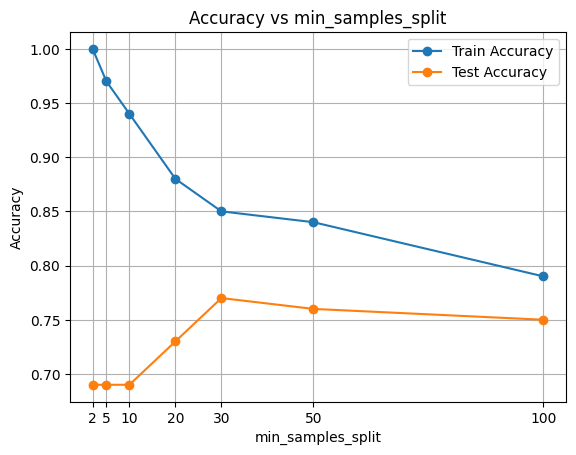

In [20]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

sample_split = [2, 5, 10, 20, 30, 50, 100]
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y, random_state=1)

accuracies_train = []
accuracies_test = []

for split in sample_split:
    split_accuracies_train = []
    split_accuracies_test = []
    for i in range(10):
        predictor = DecisionTreeClassifier(min_samples_split=split, random_state=1)
        predictor.fit(X_train, y_train)
        y_pred = predictor.predict(X_train)
        y_pred1 = predictor.predict(X_test)
        split_accuracies_train.append(metrics.accuracy_score(y_train, y_pred))
        split_accuracies_test.append(metrics.accuracy_score(y_test, y_pred1))
    avg_accuracy_train = np.mean(split_accuracies_train)
    accuracies_train.append(avg_accuracy_train)
    avg_accuracy_test = np.mean(split_accuracies_test)
    accuracies_test.append(avg_accuracy_test)

accuracies_train = [round(acc, 2) for acc in accuracies_train]
accuracies_test = [round(acc, 2) for acc in accuracies_test]

print("Train accuracies: ", accuracies_train, "\nTest accuracies: ", accuracies_test)
plt.plot(sample_split, accuracies_train, marker='o', label='Train Accuracy')
plt.plot(sample_split, accuracies_test, marker='o', label='Test Accuracy')
plt.grid()
plt.xticks(sample_split)
plt.title('Accuracy vs min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


<h4> <font color="cyan"> 3) [2v]  Critically analyze these results, including the generalization capacity across settings.

For low values of minimum sample split ({2, 5, 10}), the results show symptoms of overfitting as the model performs well on the training data ({1.0, 0.97, 0.94}) but poorly on the testing set ({0.69, 0.69, 0.69}). This occurs because the model over-adjusts to the training set and doesn't generalize well to new data.

As the minimum sample split increases to intermediate values ({20, 30}), the training accuracy decreases ({0.88, 0.85}), but the testing accuracy improves ({0.73, 0.77}), peaking at a minimum sample split of 30. This happens because, although the training accuracy decreases, the model's ability to generalize to new data, possibly not covered in the training set, increases, leading to better testing accuracy.

For higher values of minimum sample split ({50, 100}), both training and testing accuracies decrease ({0.84, 0.79} for training, and {0.76, 0.75} for testing). This happens because the model becomes too broad, meaning its predictive ability diminishes slightly for both training and testing.

In conclusion, low values of minimum sample split should be avoided to prevent overfitting, but excessively high values should also be avoided to prevent the model from becoming overly generalized. Balancing both training and testing accuracies is critical when choosing the optimal minimum sample split.

<h4> <font color="cyan"> 4) [2v] To deploy the predictor, a healthcare provider opted to learn a single decision tree 
(random_state=1) using all available data and ensuring that the maximum depth would be 3 
in order to avoid overfitting risks.</font>

<h5><font color="cyan">&nbsp;i. Plot the decision tree. </font>

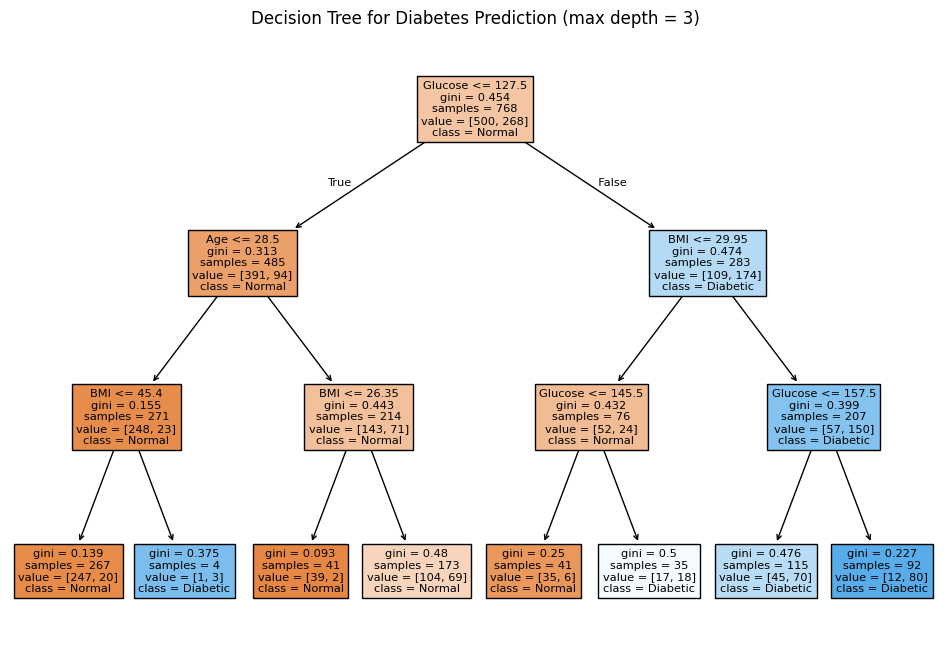

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(max_depth=3, random_state=1)
clf.fit(x, y)

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=x.columns, class_names=['Normal', 'Diabetic'], filled=True)
plt.title('Decision Tree for Diabetes Prediction (max depth = 3)')
plt.show()

<h5><font color="cyan">&nbsp;ii. Explain what characterizes diabetes by identifying the conditional associations together with their posterior probabilities.</font>

Através da arvore podemos observar que existem três grupos de pacientes que foram diagnosticados com Diabetes. Para o primeiro grupo é necessário que a feature Glucose seja menor ou igual a 127.5, é preciso também que sejam pessoas com idades menores ou iguais a 28.5 anos e por fim que tenham um BMI superior a 45.4.
No segundo grupo a condição de ser diagnosticado com Diabetes é ter Glucose superior a 127.5 
